<a href="https://colab.research.google.com/github/mandyyy25/PYTHON/blob/main/Sales.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Sales Analysis Using **Pandas** and **Seaborn** Librarys
In this project I analyzed a sales database for a fictional for an electronic store. I started with a general analysis of the data: type, column and lines quantity and nulls. So I can transform the data for a proper analysis.
After that I categorized the data to show me the sales per channel, witch just by looking showed me that mobile went a little futher in the sales number.Then I made a few changes: replaced the name "App" to "Aplicativo", replaced everything that contains space to "_" and I removed nulls;
Then, I added the data to show me witch department went best in sales number in a growing order. Grouped tha sales per month, to show me witch end up best.
Richt after, I imported another database that contains information about the client like age and income. So I can do more detailed analyzes by combining the two databases. First I did a descriptive analysis with the average, minimum, maximum, the quarters and so on. I transformed the type of the data Income to float.
Finally I combined the two databases "Sales" and "Client", Using the function "Merge". Based on that I made grouped analyzes of sales of products by income and by age.


---


# Graphics Using the **MATPLOTLIB** and **PLOTLY** Library
So here is the visual analyses of the data so we can come with more scenarios and insights about decisions that need to be taken to improve the number and quality of the sales.
Tha analyses using the Matplotlib were more laborious, So I made the same plots using tha plotly library witch use much less lines of code and the graphics were organized better.


---



In [ ]:
import pandas as pd

In [ ]:
import seaborn as sns

In [ ]:
vendas = pd.read_excel("/content/varejo.xlsx")

In [ ]:
vendas.head()

,idcompra,idcanalvenda,bandeira,Data,Preço,Preço_com_frete,Nome_Departamento,estado,cliente_Log
0,393835,Mobile,A,2023-03-05,1582.560,791.280,Telefones e Celulares,SP,15042
1,411885,Mobile,A,2023-03-17,679.200,679.200,Tablets,SP,17590
2,437305,Mobile,A,2023-03-06,35.920,37.512,Bebes,SP,15478
3,440055,APP,A,2023-01-13,2239.416,2239.416,TVs e Acessorios,SP,2933
4,455795,Mobile,B,2023-03-31,1743.200,1785.112,Esporte e Lazer,RS,19790


In [ ]:
vendas.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 80228 entries, 0 to 80227
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   idcompra           80228 non-null  int64         
 1   idcanalvenda       80228 non-null  object        
 2   bandeira           80228 non-null  object        
 3   Data               80228 non-null  datetime64[ns]
 4   Preço              79926 non-null  float64       
 5   Preço_com_frete    80228 non-null  float64       
 6   Nome_Departamento  80228 non-null  object        
 7   estado             79926 non-null  object        
 8   cliente_Log        80228 non-null  int64         
dtypes: datetime64[ns](1), float64(2), int64(2), object(4)
memory usage: 5.5+ MB


In [ ]:
vendas.groupby("idcanalvenda").idcompra.nunique()

idcanalvenda
APP         21539
Internet    24515
Mobile      24732
Name: idcompra, dtype: int64

In [ ]:
vendas["idcanalvenda"] = vendas["idcanalvenda"].str.replace("APP", "Aplicativo")

In [ ]:
vendas.groupby("idcanalvenda").idcompra.nunique()

idcanalvenda
Aplicativo    21539
Internet      24515
Mobile        24732
Name: idcompra, dtype: int64

In [ ]:
vendas["Nome_Departamento"] = vendas["Nome_Departamento"].str.replace(" ", "_")

In [ ]:
vendas.groupby("Nome_Departamento").idcompra.nunique()

Nome_Departamento
Acessorios_e_Inovacoes     3548
Alimentos                     2
Ar_e_Ventilacao             951
Audio                      1794
Automotivo                  895
Bebes                      4531
Beleza_e_Saude             4626
Brinquedos                 1320
Cama,_Mesa_e_Banho          153
Casa_e_Construcao           263
Cine_e_Foto                  11
Decoracao                   134
Eletrodomesticos          10501
Eletroportateis            9593
Esporte_e_Lazer             531
Ferramentas                1111
Games                       764
Informatica                5290
Instrumentos_Musicais         1
Linha_Industrial             86
Malas_e_Mochilas            114
Moda                          3
Moveis                     4175
Perfumaria                  624
Pet_Shop                     43
Produtos_de_Limpeza         713
Relogios                    134
TV_e_Video                    5
TVs_e_Acessorios           5326
Tablets                    1770
Telefones_e_Celulares 

In [ ]:
vendas[vendas["estado"].isnull()]

,idcompra,idcanalvenda,bandeira,Data,Preço,Preço_com_frete,Nome_Departamento,estado,cliente_Log
96,382380,Internet,A,2023-04-26,NaN,879.200,Telefones_e_Celulares,NaN,5804
284,346055,Internet,A,2023-03-23,NaN,87.648,Ar_e_Ventilacao,NaN,16359
402,172555,Mobile,A,2023-03-19,NaN,135.840,Ar_e_Ventilacao,NaN,13691
411,446380,Mobile,A,2023-03-09,NaN,1703.120,Eletrodomesticos,NaN,13024
770,40425,Mobile,B,2023-04-21,NaN,1759.200,Telefones_e_Celulares,NaN,9121
...,...,...,...,...,...,...,...,...,...
78610,399680,Aplicativo,A,2023-04-19,NaN,339.912,Eletroportateis,NaN,20873
78718,320895,Mobile,B,2023-01-20,NaN,1000.800,Telefones_e_Celulares,NaN,17772
79465,389240,Aplicativo,A,2023-01-14,NaN,279.200,Eletrodomesticos,NaN,20399
79548,124585,Mobile,A,2023-04-21,NaN,2051.240,TVs_e_Acessorios,NaN,17784


In [ ]:
vendas.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 80228 entries, 0 to 80227
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   idcompra           80228 non-null  int64         
 1   idcanalvenda       80228 non-null  object        
 2   bandeira           80228 non-null  object        
 3   Data               80228 non-null  datetime64[ns]
 4   Preço              79926 non-null  float64       
 5   Preço_com_frete    80228 non-null  float64       
 6   Nome_Departamento  80228 non-null  object        
 7   estado             79926 non-null  object        
 8   cliente_Log        80228 non-null  int64         
dtypes: datetime64[ns](1), float64(2), int64(2), object(4)
memory usage: 5.5+ MB


In [ ]:
vendas_sem_nulos = vendas.dropna()

In [ ]:
vendas_sem_nulos.info()

<class 'pandas.core.frame.DataFrame'>
Index: 79926 entries, 0 to 80227
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   idcompra           79926 non-null  int64         
 1   idcanalvenda       79926 non-null  object        
 2   bandeira           79926 non-null  object        
 3   Data               79926 non-null  datetime64[ns]
 4   Preço              79926 non-null  float64       
 5   Preço_com_frete    79926 non-null  float64       
 6   Nome_Departamento  79926 non-null  object        
 7   estado             79926 non-null  object        
 8   cliente_Log        79926 non-null  int64         
dtypes: datetime64[ns](1), float64(2), int64(2), object(4)
memory usage: 6.1+ MB


In [ ]:
vendas["estado"].fillna("MS", inplace=True)

In [ ]:
vendas.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 80228 entries, 0 to 80227
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   idcompra           80228 non-null  int64         
 1   idcanalvenda       80228 non-null  object        
 2   bandeira           80228 non-null  object        
 3   Data               80228 non-null  datetime64[ns]
 4   Preço              79926 non-null  float64       
 5   Preço_com_frete    80228 non-null  float64       
 6   Nome_Departamento  80228 non-null  object        
 7   estado             80228 non-null  object        
 8   cliente_Log        80228 non-null  int64         
dtypes: datetime64[ns](1), float64(2), int64(2), object(4)
memory usage: 5.5+ MB


In [ ]:
vendas.groupby("Nome_Departamento").idcompra.nunique().sort_values(ascending=False)

Nome_Departamento
Telefones_e_Celulares     14495
Eletrodomesticos          10501
Eletroportateis            9593
TVs_e_Acessorios           5326
Informatica                5290
Beleza_e_Saude             4626
Bebes                      4531
Moveis                     4175
Utilidades_Domesticas      3728
Acessorios_e_Inovacoes     3548
Audio                      1794
Tablets                    1770
Brinquedos                 1320
Ferramentas                1111
Ar_e_Ventilacao             951
Automotivo                  895
Games                       764
Produtos_de_Limpeza         713
Perfumaria                  624
Esporte_e_Lazer             531
Casa_e_Construcao           263
Cama,_Mesa_e_Banho          153
Decoracao                   134
Relogios                    134
Malas_e_Mochilas            114
Linha_Industrial             86
Pet_Shop                     43
Cine_e_Foto                  11
TV_e_Video                    5
Moda                          3
Alimentos             

In [ ]:
round(vendas.groupby("Nome_Departamento")["Preço_com_frete"].agg("mean").sort_values(ascending=False).reset_index(),2)

,Nome_Departamento,Preço_com_frete
0,TV e Video,9847.26
1,TVs e Acessorios,2058.40
2,Informatica,2017.66
3,Linha Industrial,1668.68
4,Cine e Foto,1461.08
5,Telefones e Celulares,1418.89
6,Eletrodomesticos,1233.77
7,Esporte e Lazer,1034.54
8,Tablets,961.47
9,Instrumentos Musicais,834.61


In [ ]:
vendas["mês"] = vendas["Data"].dt.month

In [ ]:
vendas.groupby("mês").idcompra.nunique().sort_values(ascending=False)

mês
3    19056
4    18381
1    18235
2    17393
Name: idcompra, dtype: int64

In [ ]:
cliente = pd.read_excel("/content/cliente_varejo.xlsx")

In [ ]:
cliente[["idade", "renda"]].describe()

,idade,renda
count,26425.000000,26425.000000
mean,53.412564,8241.470350
std,20.698825,3899.871482
min,18.000000,1500.000000
25%,35.000000,4859.000000
50%,53.000000,8234.000000
75%,71.000000,11629.000000
max,89.000000,15000.000000


In [ ]:
cliente.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26425 entries, 0 to 26424
Data columns (total 3 columns):
 #   Column       Non-Null Count  Dtype
---  ------       --------------  -----
 0   cliente_Log  26425 non-null  int64
 1   idade        26425 non-null  int64
 2   renda        26425 non-null  int64
dtypes: int64(3)
memory usage: 619.5 KB


In [ ]:
cliente = cliente.astype({"renda":"float"})

In [ ]:
cliente.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26425 entries, 0 to 26424
Data columns (total 3 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   cliente_Log  26425 non-null  int64  
 1   idade        26425 non-null  int64  
 2   renda        26425 non-null  float64
dtypes: float64(1), int64(2)
memory usage: 619.5 KB


In [ ]:
vendas_cliente = vendas.merge(cliente, how = "left", on = "cliente_Log")

In [ ]:
vendas_cliente.head()

,idcompra,idcanalvenda,bandeira,Data,Preço,Preço_com_frete,Nome_Departamento,estado,cliente_Log,mês,idade,renda
0,393835,Mobile,A,2023-03-05,1582.560,791.280,Telefones_e_Celulares,SP,15042,3,89,11337.0
1,411885,Mobile,A,2023-03-17,679.200,679.200,Tablets,SP,17590,3,54,2050.0
2,437305,Mobile,A,2023-03-06,35.920,37.512,Bebes,SP,15478,3,47,8258.0
3,440055,Aplicativo,A,2023-01-13,2239.416,2239.416,TVs_e_Acessorios,SP,2933,1,39,4671.0
4,440055,Aplicativo,A,2023-01-13,2239.416,2239.416,TVs_e_Acessorios,SP,2933,1,53,11717.0


In [ ]:
agg_idcanalvenda_renda = round(vendas_cliente.groupby("idcanalvenda")["renda"].agg("mean").reset_index(),2)

In [ ]:
agg_idcanalvenda_renda

,idcanalvenda,renda
0,Aplicativo,8240.51
1,Internet,8236.34
2,Mobile,8234.67


In [ ]:
agg_idade_bandeira = round(vendas_cliente.groupby("bandeira")["idade"].agg("mean").reset_index(),2)

In [ ]:
agg_idade_bandeira

,bandeira,idade
0,A,53.46
1,B,53.39


In [ ]:
import matplotlib.pyplot as plt

Text(0.5, 1.0, 'Idade Média por Bandeira')

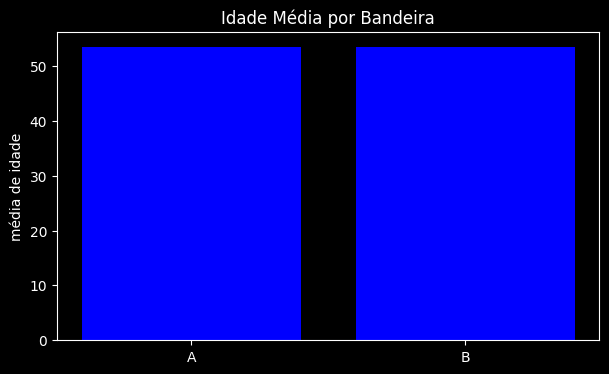

In [ ]:
Fig = plt.figure(figsize = (7,4))
plt.bar(agg_idade_bandeira["bandeira"], agg_idade_bandeira["idade"], color = "blue")
plt.ylabel("média de idade")
plt.title("Idade Média por Bandeira", loc = "center")


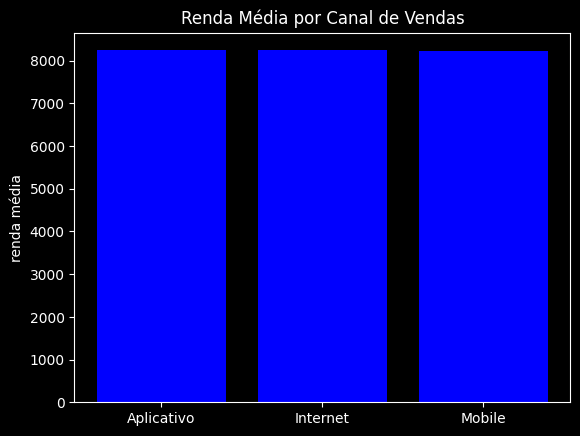

In [ ]:
plt.bar(agg_idcanalvenda_renda["idcanalvenda"], agg_idcanalvenda_renda["renda"], color = "blue")
plt.ylabel("renda média")
plt.title("Renda Média por Canal de Vendas", loc = "center"); # obs: o ponto e vírgula no final tira as informações em cima do gráfico

In [ ]:
venda_por_data = vendas_cliente.groupby("Data").idcompra.nunique().reset_index()
venda_por_data

,Data,idcompra
0,2023-01-02,669
1,2023-01-03,607
2,2023-01-04,678
3,2023-01-05,672
4,2023-01-06,676
...,...,...
114,2023-04-26,702
115,2023-04-27,717
116,2023-04-28,652
117,2023-04-29,685


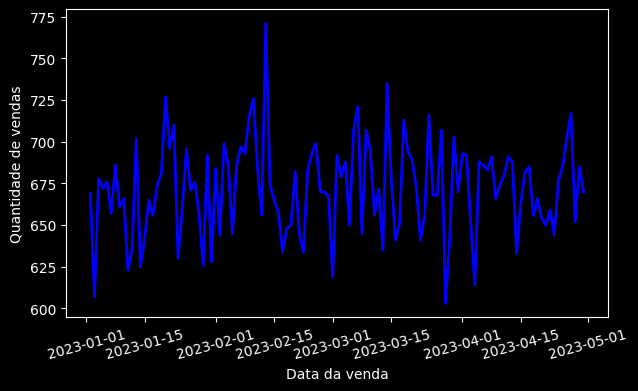

In [ ]:
fig = plt.figure(figsize=(7,4))

plt.xlabel("Data da venda")
plt.ylabel("Quantidade de vendas")
plt.xticks(rotation=15)
x = venda_por_data["Data"]
y = venda_por_data["idcompra"]

plt.plot(x,y, color = "blue", linewidth = "2")
plt.show()

In [ ]:
agg_dept_preço = round(vendas.groupby("Nome_Departamento")["Preço_com_frete"].agg("mean").sort_values(ascending=False).reset_index(),2)
agg_dept_preço

,Nome_Departamento,Preço_com_frete
0,TV_e_Video,9847.26
1,TVs_e_Acessorios,2058.40
2,Informatica,2017.66
3,Linha_Industrial,1668.68
4,Cine_e_Foto,1461.08
5,Telefones_e_Celulares,1418.89
6,Eletrodomesticos,1233.77
7,Esporte_e_Lazer,1034.54
8,Tablets,961.47
9,Instrumentos_Musicais,834.61


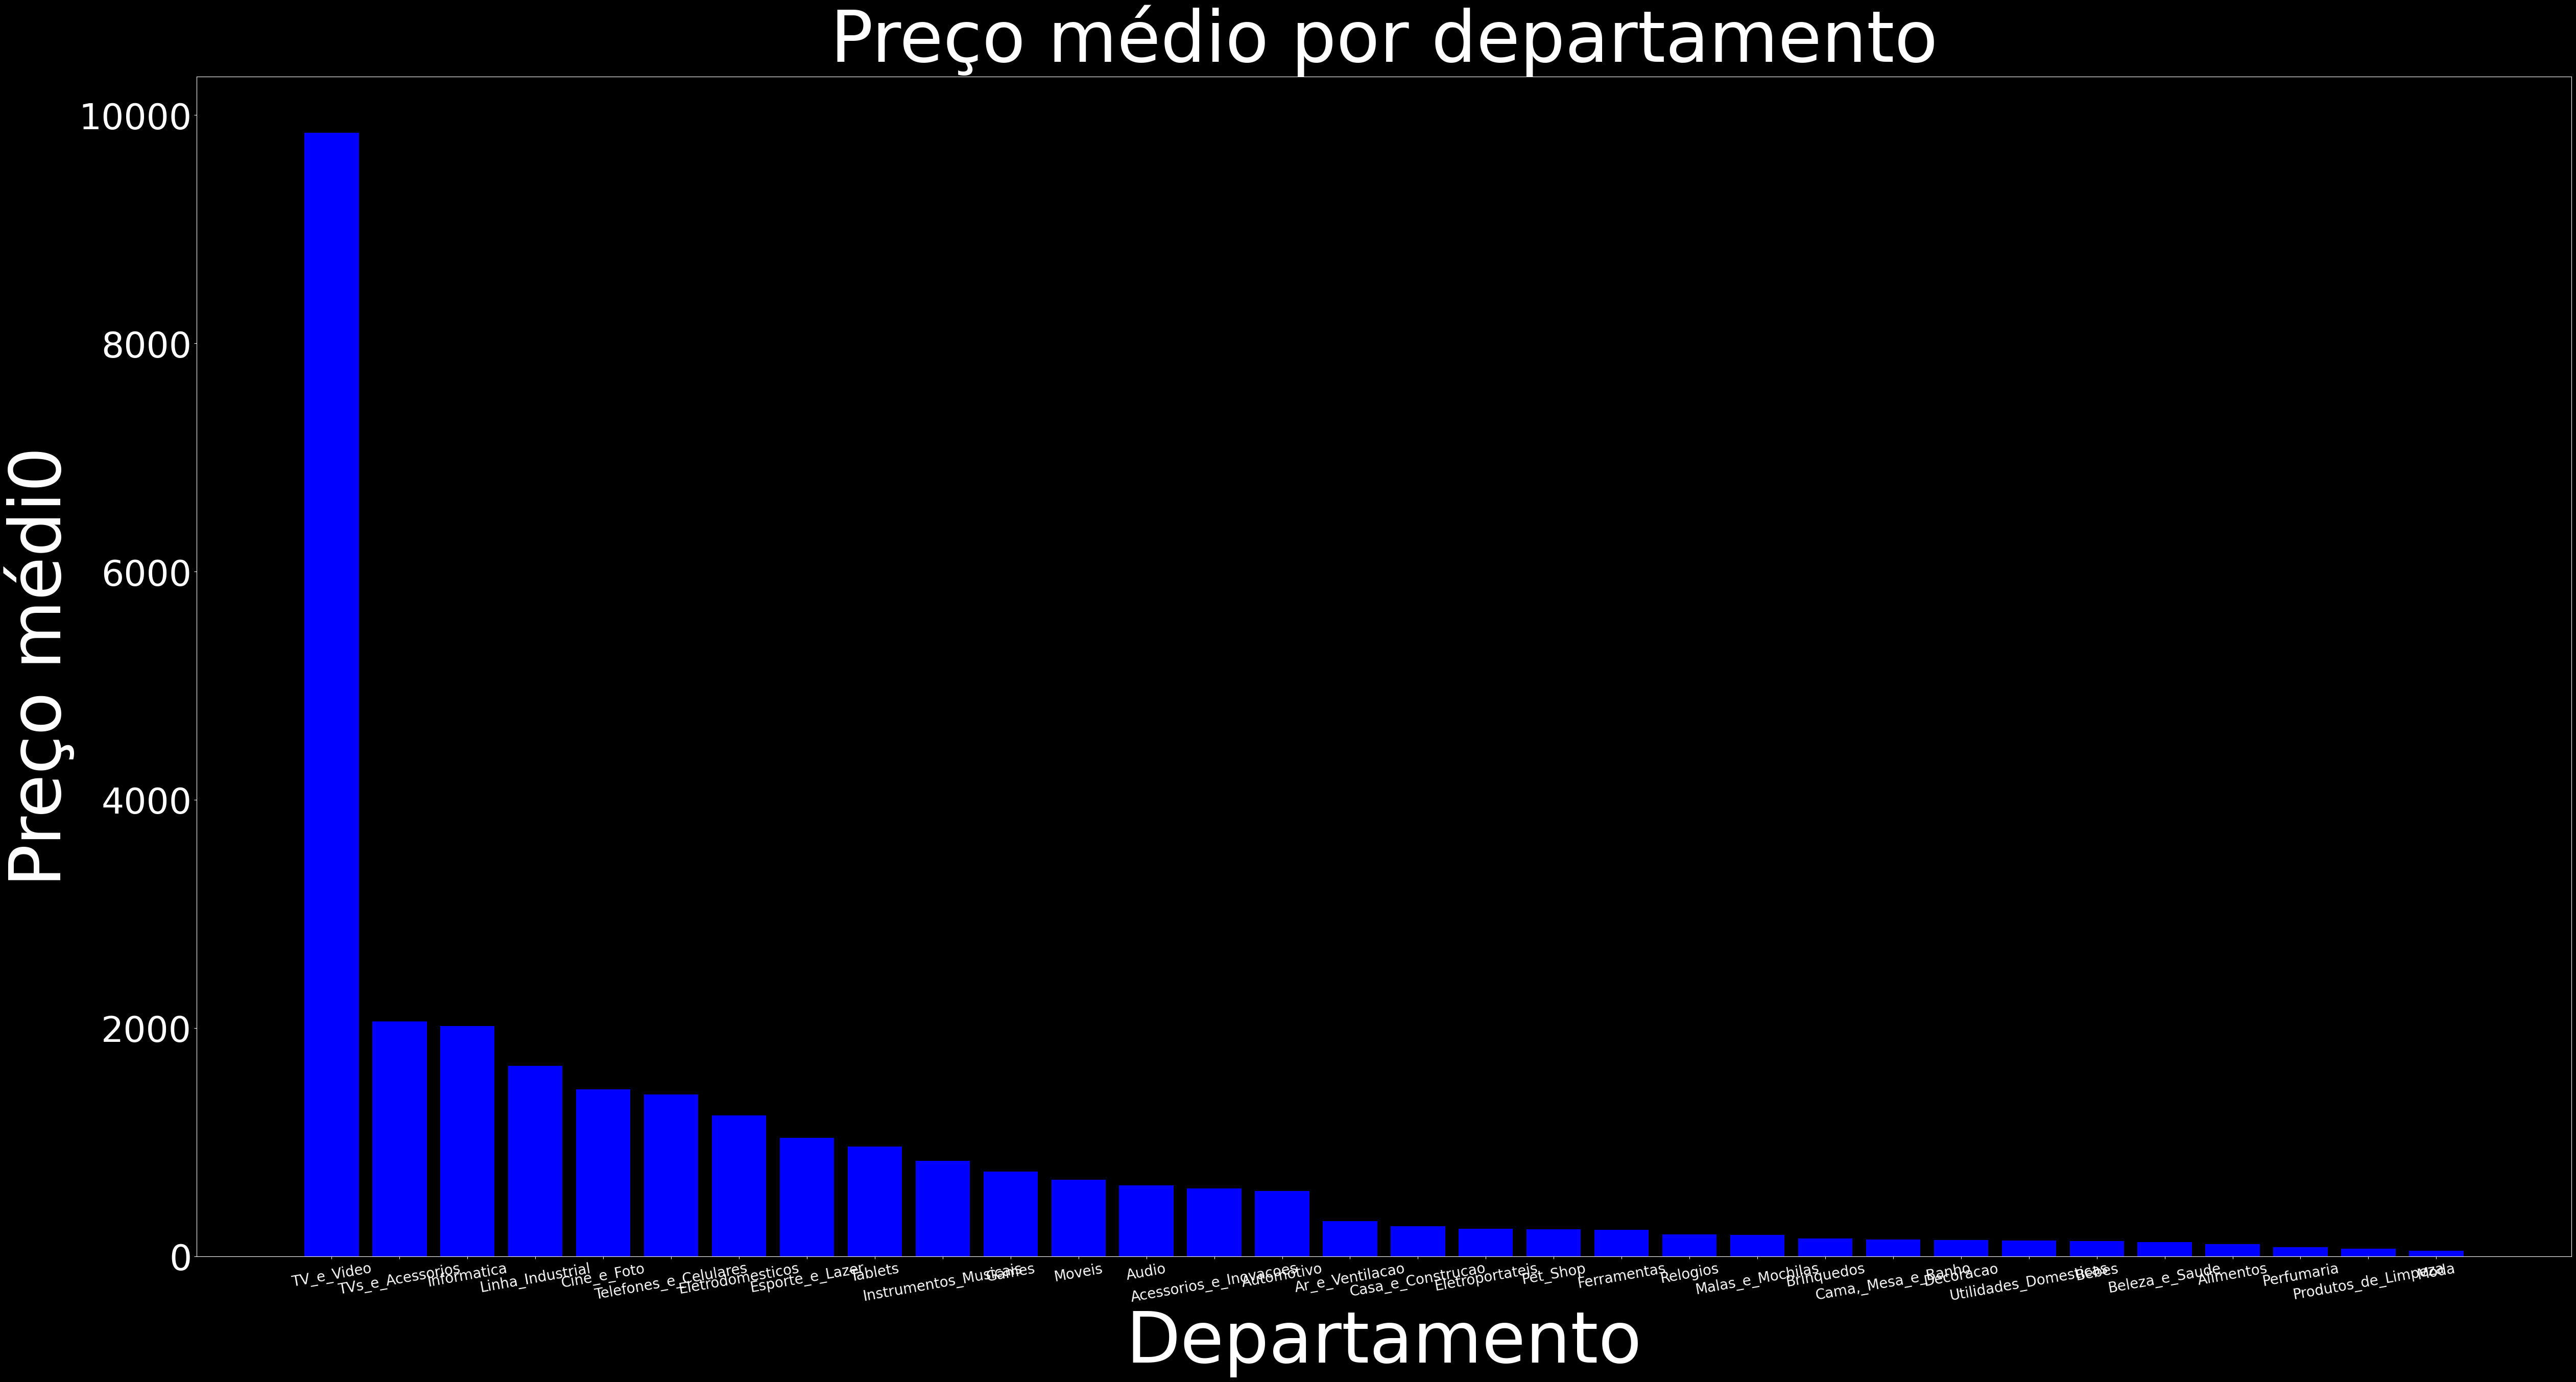

In [ ]:
fig = plt.figure(figsize=(60,30))
plt.bar(agg_dept_preço["Nome_Departamento"], agg_dept_preço["Preço_com_frete"], color = "blue")
plt.ylabel("Preço médi0", size = 100)
plt.xlabel("Departamento", size = 100)
plt.yticks(size=50)
plt.xticks(size=20)
plt.xticks(rotation=10)
plt.title("Preço médio por departamento", loc = "center", size = 100);
plt.style.use("dark_background")

USANDO BIBLIOTECAS DE DATA VIZUALIZATION MAIS SOFISTICADAS:

In [ ]:
# FAZER O MESMO GRÁFICO USANDO AS NOVAS BIBLIO
%pip install plotly
%pip install cufflinks
%pip install chart-studio

In [ ]:
import chart_studio.plotly as py
import cufflinks as cf
import plotly.graph_objects as go
import plotly.express as px

In [ ]:

px.line(venda_por_data, x = "Data", y = "idcompra", title = "Quantidade de vendas por data",  template = "plotly_dark")


In [ ]:
px.bar(agg_dept_preço, x ="Nome_Departamento", y = "Preço_com_frete", template = "plotly_dark")

In [ ]:
fig = px.line(venda_por_data, x = "Data", y = "idcompra")
fig.update_xaxes(title_text='Data da Venda')
fig.update_yaxes(title_text='Quantidade de Vendas')
fig.show()
